In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)
plt.rcParams['figure.figsize'] = [20, 10]
import os
import random

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Previous data")

In [3]:
#read POI file
poiFile = "export_sequences_pois/part-00000-tid-3468191993212165780-9a0837bc-42a1-45b6-a001-0413e2007ad7-11190-1-c000.snappy.parquet"
pois = pd.read_parquet(poiFile)

In [4]:
#all is poi
pois.stop_type.unique().tolist()

['poi']

In [5]:
poi_grouping = pois.name1_fs.unique().tolist()
poi_grouping

['Food',
 'Outdoors & Recreation',
 'College & University',
 'Shop & Service',
 'Professional & Other Places',
 'Arts & Entertainment',
 'Travel & Transport',
 'Nightlife Spot']

In [6]:
poi_type = pois.name2_fs.unique().tolist()
len(poi_type) #number of POI subcategories

169

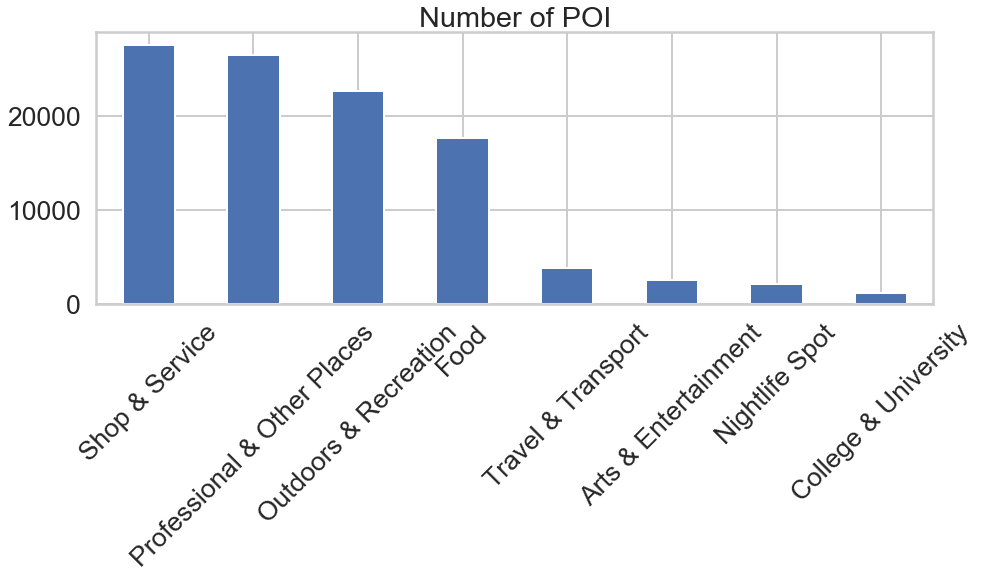

In [7]:
pois['name1_fs'].value_counts().plot(kind='bar', rot=45, figsize=(15,5), title = 'Number of POI')

In [8]:
#load all stop files
file0 = "export_sequences_stops/part-00000-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16345-1-c000.snappy.parquet"
file1 = "export_sequences_stops/part-00001-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16346-1-c000.snappy.parquet" 
file2 = "export_sequences_stops/part-00002-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16347-1-c000.snappy.parquet" 
file3 = "export_sequences_stops/part-00003-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16348-1-c000.snappy.parquet"
file4 = "export_sequences_stops/part-00004-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16349-1-c000.snappy.parquet"
file5 = "export_sequences_stops/part-00005-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16350-1-c000.snappy.parquet"
file6 = "export_sequences_stops/part-00006-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16351-1-c000.snappy.parquet"
file7 = "export_sequences_stops/part-00007-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16352-1-c000.snappy.parquet"
file8 = "export_sequences_stops/part-00008-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16353-1-c000.snappy.parquet"
file9 = "export_sequences_stops/part-00009-tid-8490611500197620005-9dbd307a-18b1-4e37-84de-71873bc997ab-16354-1-c000.snappy.parquet"


stops0 = pd.read_parquet(file0)
stops1 = pd.read_parquet(file1)
stops2 = pd.read_parquet(file2)
stops3 = pd.read_parquet(file3)
stops4 = pd.read_parquet(file4)
stops5 = pd.read_parquet(file5)
stops6 = pd.read_parquet(file6)
stops7 = pd.read_parquet(file7)
stops8 = pd.read_parquet(file8)
stops9 = pd.read_parquet(file9)

In [9]:
#all user files, is merged
data = pd.concat([stops0, stops1, stops2, stops3, stops4, stops5, stops6, stops7, stops8, stops9]).sort_values(by=['userId', 'incrementalId'])
data

,userId,incrementalId,POIId,weekday,hour,stop_type
2000346,0,1,NaN,4,0,home
2005138,0,2,NaN,4,11,other
1538678,0,3,NaN,4,12,home
1528369,0,4,NaN,5,0,home
347211,0,5,1.357210e+12,5,10,poi
...,...,...,...,...,...,...
869494,51539619951,355,NaN,6,13,home
579631,51539619951,356,NaN,6,18,other
517417,51539619951,357,NaN,6,22,home
2170389,51539619951,358,NaN,7,0,home


In [10]:
poidata = data[data.stop_type == 'poi']['POIId'].unique().tolist()
len(poidata)

104022

In [11]:
pois[~pois.POIId.isin(poidata)]

,name1_fs,name2_fs,stop_type,POIId


In [12]:
pois

,name1_fs,name2_fs,stop_type,POIId
0,Food,Fast Food Restaurant,poi,8589934592
1,Food,Restaurant,poi,8589934593
2,Outdoors & Recreation,Playground,poi,8589934594
3,College & University,University,poi,8589934595
4,Shop & Service,Convenience Store,poi,8589934596
...,...,...,...,...
104017,Professional & Other Places,Community Center,poi,1666447311381
104018,Food,Restaurant,poi,1666447311382
104019,Outdoors & Recreation,Athletics & Sports,poi,1666447311383
104020,Outdoors & Recreation,Athletics & Sports,poi,1666447311384


In [13]:
df = pd.merge(data, pois, how = "left", on=["POIId"]).drop(columns=['stop_type_y']).rename(columns={'stop_type_x': 'stop_type'})
df

,userId,incrementalId,POIId,weekday,hour,stop_type,name1_fs,name2_fs
0,0,1,NaN,4,0,home,NaN,NaN
1,0,2,NaN,4,11,other,NaN,NaN
2,0,3,NaN,4,12,home,NaN,NaN
3,0,4,NaN,5,0,home,NaN,NaN
4,0,5,1.357210e+12,5,10,poi,Professional & Other Places,Medical Center
...,...,...,...,...,...,...,...,...
25114422,51539619951,355,NaN,6,13,home,NaN,NaN
25114423,51539619951,356,NaN,6,18,other,NaN,NaN
25114424,51539619951,357,NaN,6,22,home,NaN,NaN
25114425,51539619951,358,NaN,7,0,home,NaN,NaN


In [14]:
#number of ID(number of users) across the whole data set
users = df['userId'].unique().tolist()
len(users)

99285

In [15]:
#number of stops for each user
stop = df.groupby(['userId']).count()['incrementalId'].reset_index()
stop

,userId,incrementalId
0,0,217
1,1,259
2,2,150
3,3,188
4,4,278
...,...,...
99280,51539619947,263
99281,51539619948,352
99282,51539619949,143
99283,51539619950,351


In [16]:
#number of stops at home, other, poi, work for each user
stopTypeCount = df.groupby(['userId', 'stop_type']).count()['incrementalId'].unstack().fillna(0)

In [17]:
homeCount = stopTypeCount['home'].reset_index()

In [18]:
#users with less than 60 stops
minStop = 60
fewStop = stop[stop.incrementalId < minStop]

In [19]:
print(len(fewStop))

1782


In [20]:
#copy of the original dataframe
dfBeforeFilter = df.copy()

In [21]:
#df witout the users that should be deleted, which is in fewStop
df = df[~df.userId.isin(fewStop['userId'])]

In [22]:
users =  df['userId'].unique().tolist()
len(users)

97503

In [23]:
stopTypeCount = df.groupby(['userId', 'stop_type']).count()['incrementalId'].unstack().fillna(0)

In [24]:
homeStop = stopTypeCount.iloc[:,0]

In [25]:
otherStop = stopTypeCount.iloc[:,1]

In [26]:
poiStop = stopTypeCount.iloc[:,2]

In [27]:
workStop = stopTypeCount.iloc[:,3]

In [28]:
#Average number of stops in total
sum(stopTypeCount.sum())/len(stopTypeCount)

256.8731115965663

In [29]:
#Average number of stops at home
sum(homeStop)/len(stopTypeCount)

124.80883665117996

In [30]:
#Average number of stops at other
sum(otherStop)/len(stopTypeCount)

38.575325887408596

In [31]:
#average number of stop at POI
sum(poiStop)/len(stopTypeCount)

57.8138313692912

In [32]:
#Average number of stops at work
sum(workStop)/len(stopTypeCount)

35.675117688686505

In [33]:
#min number of stops(all stop)
print(min(stopTypeCount.sum(axis=1)))

#max number of stops(all stop)
print(max(stopTypeCount.sum(axis=1)))

60.0
1289.0


In [34]:
#min number of stops at home
print(min(homeStop))

#max number of stops at home
print(max(homeStop))

0.0
1206.0


In [35]:
#min number of stops at other
print(min(otherStop))

#max number of stops at other
print(max(otherStop))

0.0
650.0


In [36]:
#min number of stops at POI
print(min(poiStop))

#max number of stops at POI
print(max(poiStop))

0.0
660.0


In [37]:
#min number of stops at work
print(min(workStop))

#max number of stops at work
print(max(workStop))

0.0
608.0


In [38]:
#the number of users, that does not have a stop at home
len(users) - len(df[df.stop_type == 'home'].groupby('userId').count())

122

In [39]:
#the number of users, that does not have a stop at other
len(users) - len(df[df.stop_type == 'other'].groupby('userId').count())

2473

In [40]:
#the number of users, that does not have a stop at POI
len(users) - len(df[df.stop_type == 'poi'].groupby('userId').count())

820

In [41]:
#the number of users, that does not have a stop at work
len(users) - len(df[df.stop_type == 'work'].groupby('userId').count())

18823

In [42]:
mostVisited = df[df.stop_type == 'poi'][['POIId', 'userId', 'name1_fs', 'name2_fs']].groupby(['POIId', 'name1_fs', 'name2_fs']).count()['userId'].nlargest(10)

In [43]:
dfMostVisited = pd.DataFrame(data=mostVisited).reset_index()
dfMostVisited

,POIId,name1_fs,name2_fs,userId
0,6.957847e+11,Travel & Transport,Airport,8917
1,1.717987e+10,Travel & Transport,Airport,8458
2,3.435974e+10,Travel & Transport,Train Station,8259
3,5.153961e+10,Travel & Transport,Airport,6109
4,1.030792e+12,Shop & Service,Shopping Mall,5466
5,3.350074e+11,Travel & Transport,Airport,4999
6,1.417339e+12,Shop & Service,Shopping Mall,4983
7,5.239860e+11,Arts & Entertainment,Casino,4774
8,4.380867e+11,Travel & Transport,Train Station,4538
9,1.090922e+12,Professional & Other Places,Medical Center,4239


[Text(0.5, 1.0, 'Most visited POIs')]

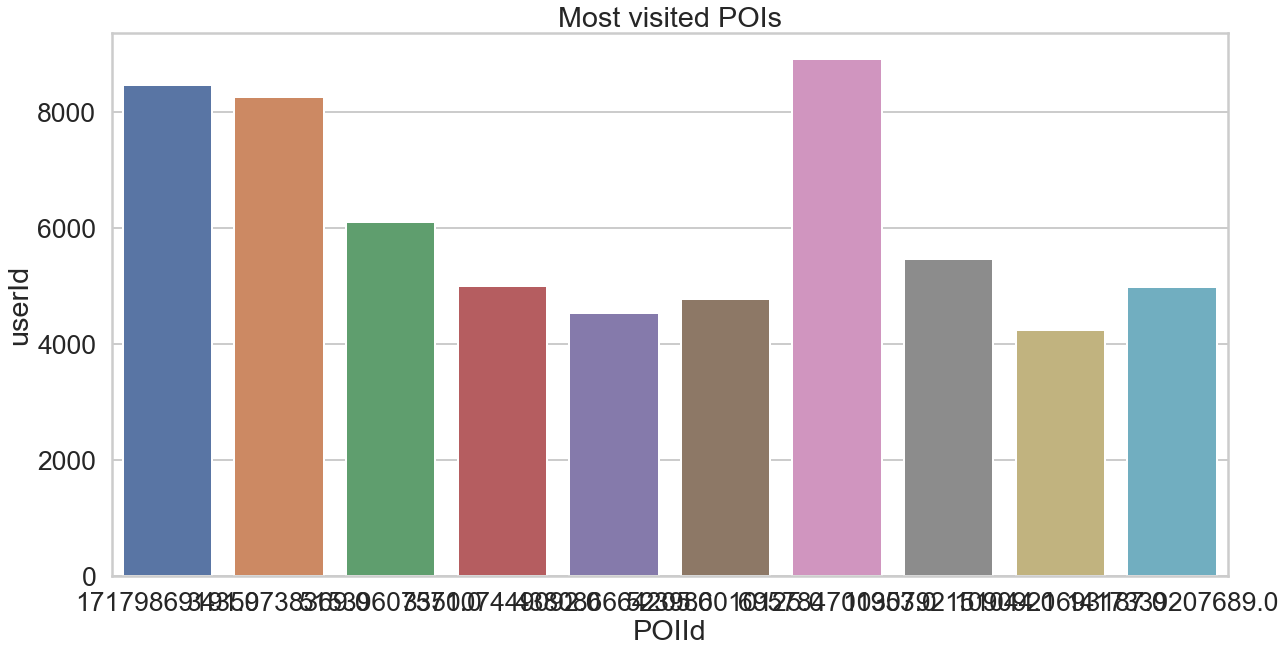

In [44]:
#This plot shows how many visits the most visited POIs has
sns.barplot(x = 'POIId', y = 'userId', data=dfMostVisited).set(title='Most visited POIs')

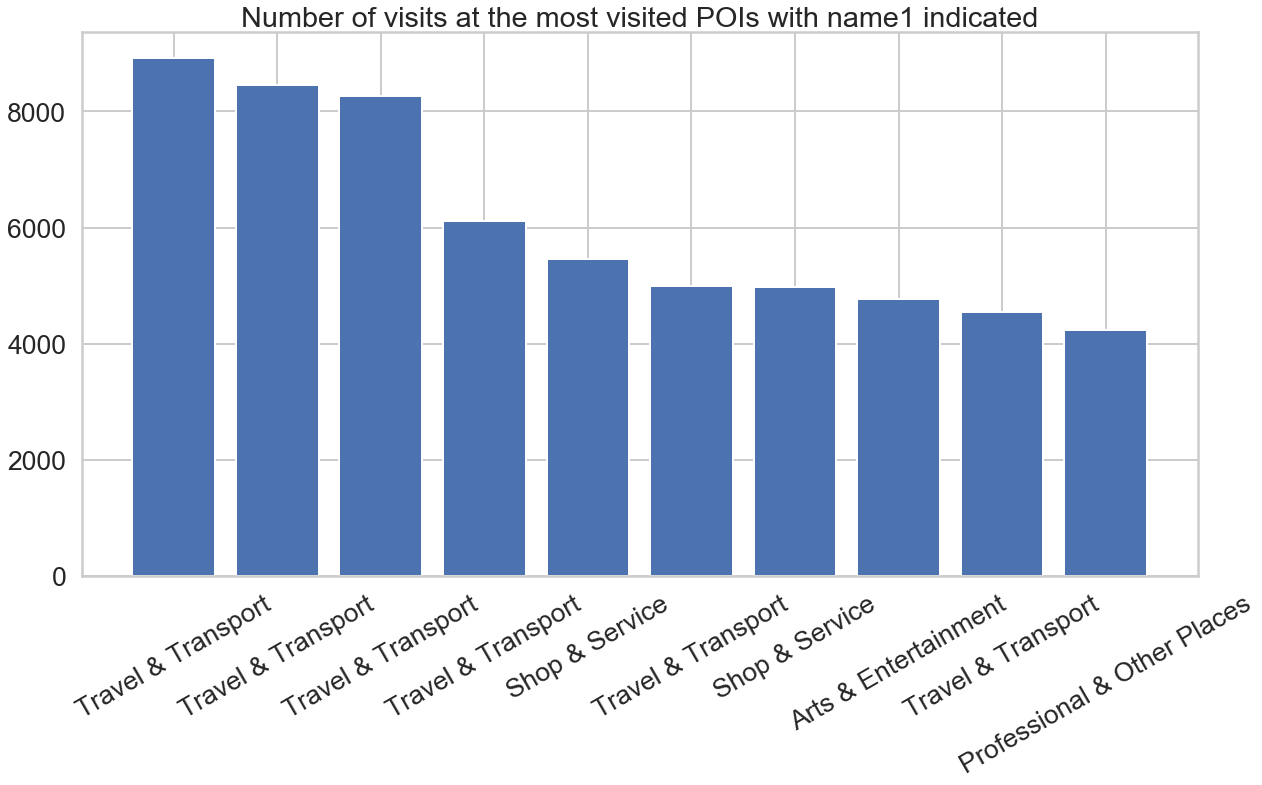

In [45]:
#This plot show the number of visits and which category for name1 the POI is wi
 
# create a dataset
#height = [3, 12, 5, 18, 45]
height = dfMostVisited['userId'].tolist()
bars = dfMostVisited['name1_fs'].tolist()
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height)
#color=['black', 'black', 'black', 'black', 'red', 'black', 'red', 'blue', 'black', 'pink'])

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation = 30)
plt.title('Number of visits at the most visited POIs with name1 indicated')

# Show graph
plt.show()

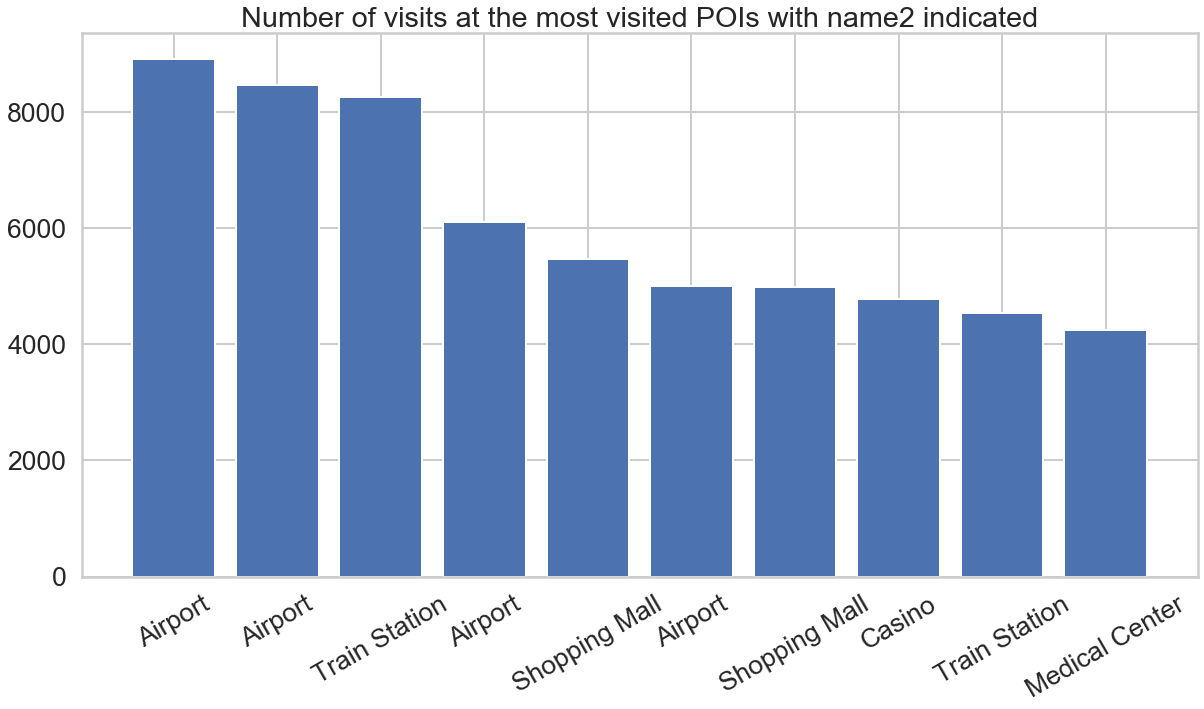

In [46]:
#This plot show the number of visits and which category for name2 the POI is wi
 
# create a dataset
#height = [3, 12, 5, 18, 45]
height = dfMostVisited['userId'].tolist()
bars = dfMostVisited['name2_fs'].tolist()
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation = 30)
plt.title('Number of visits at the most visited POIs with name2 indicated')

# Show graph
plt.show()

In [47]:
mostVisitN1 = dfMostVisited.groupby('name1_fs').count()['userId'].reset_index()
mostVisitN2 = dfMostVisited.groupby('name2_fs').count()['userId'].reset_index()

[Text(0.5, 1.0, 'Number of POIs in each category of the 10 most visited POIs')]

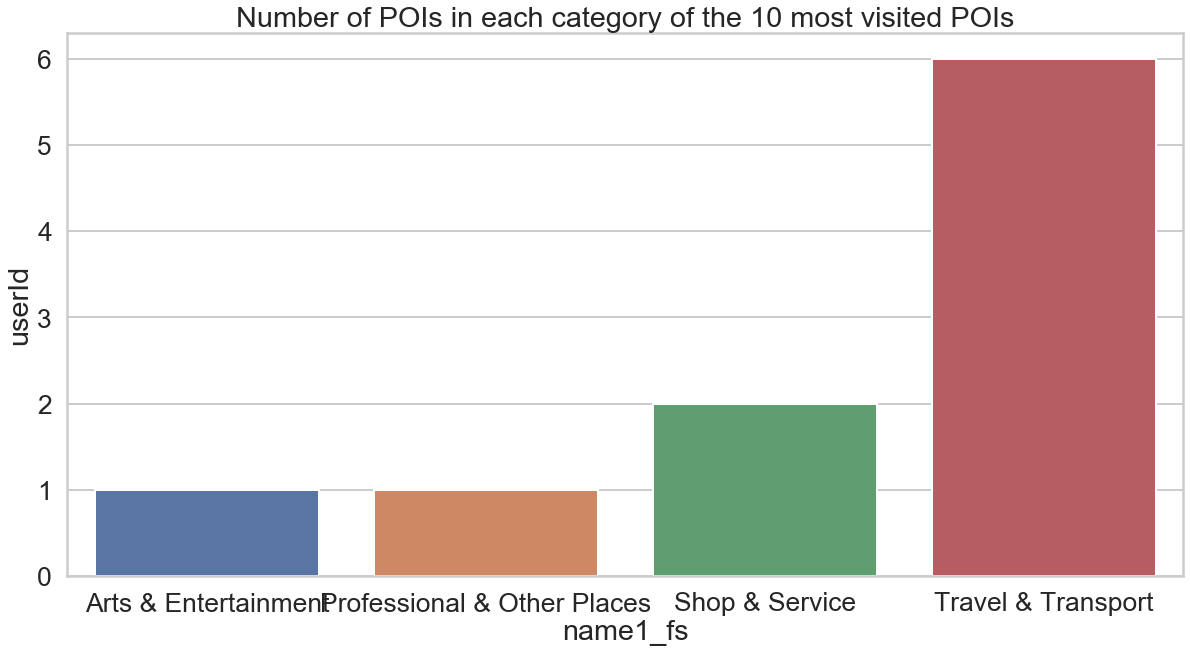

In [48]:
#This plot shows how many POIs that are in each category
sns.barplot(x = 'name1_fs', y = 'userId', data=mostVisitN1).set(title='Number of POIs in each category of the 10 most visited POIs')

[Text(0.5, 1.0, 'Number of POIs in each category of the 10 most visited POIs')]

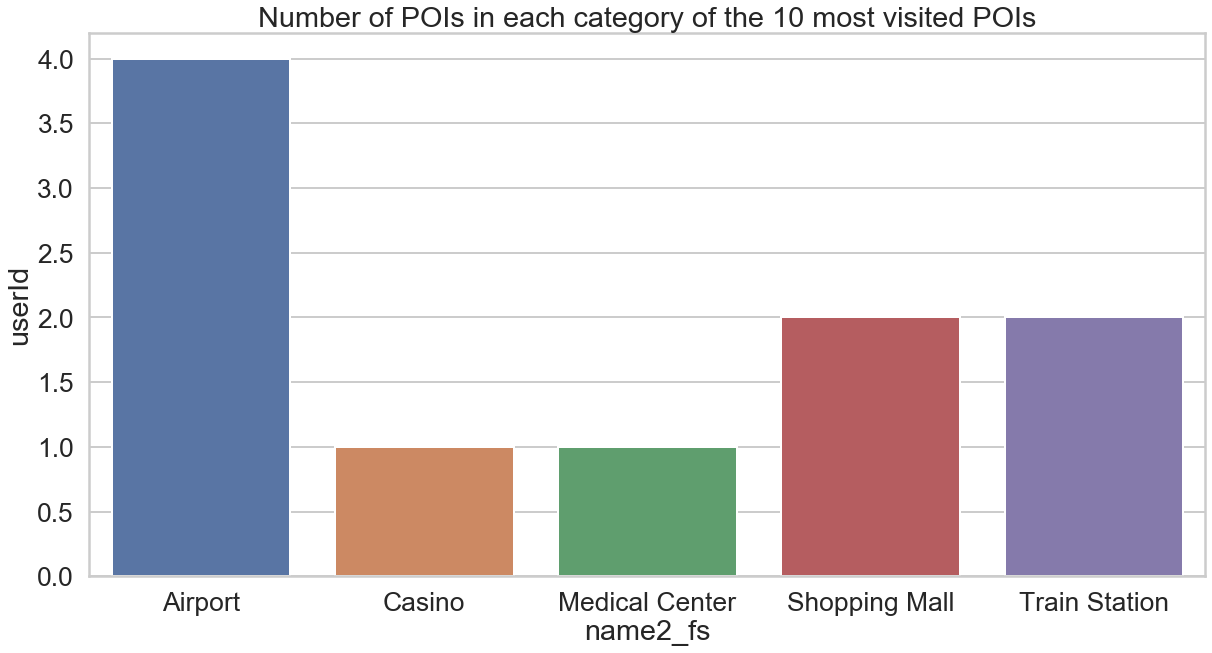

In [49]:
#This plot shows how many POIs that are in each category
sns.barplot(x = 'name2_fs', y = 'userId', data=mostVisitN2).set(title='Number of POIs in each category of the 10 most visited POIs')

In [50]:
#category 1 and 2 that are most visited
mostVisitCat1 = df[df.stop_type == 'poi'].groupby('name1_fs').count()['userId'].reset_index()
mostVisitCat2 = df[df.stop_type == 'poi'].groupby('name2_fs').count()['userId'].nlargest(20).reset_index()

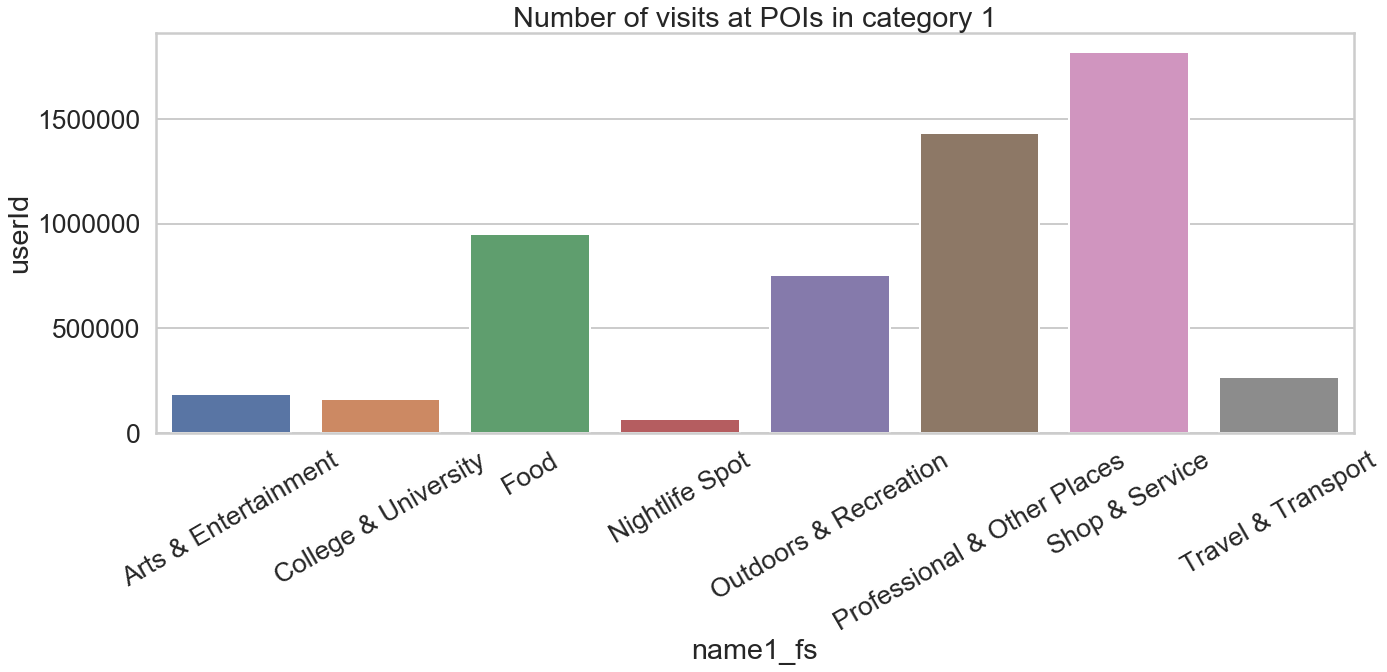

In [51]:
#This plot shows how many visits there are at POIs in name 1
sns.barplot(x = 'name1_fs', y = 'userId', data=mostVisitCat1).set(title='Number of visits at POIs in category 1')
plt.xticks(rotation=30)
plt.tight_layout()

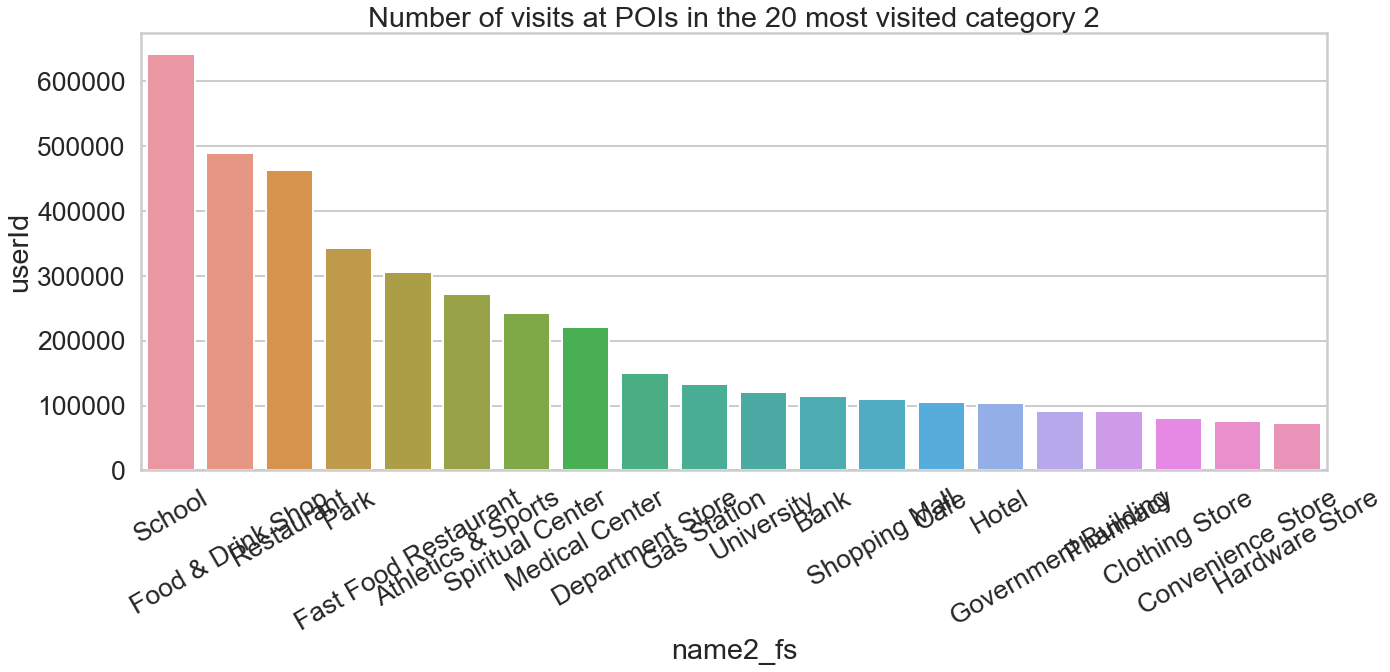

In [52]:
#This plot shows how many visits there are at POIs in the 20 most visited category 2
sns.barplot(x = 'name2_fs', y = 'userId', data=mostVisitCat2).set(title='Number of visits at POIs in the 20 most visited category 2')
plt.xticks(rotation=30)
plt.tight_layout()

In [53]:
#Now the thing above should also be done with the least visited
leastVisited = df[df.stop_type == 'poi'][['POIId', 'userId', 'name1_fs', 'name2_fs']].groupby(['POIId', 'name1_fs', 'name2_fs']).count()['userId'].nsmallest(9640)
dfLeastVisited = pd.DataFrame(data=leastVisited).reset_index()
dfLeastVisited

,POIId,name1_fs,name2_fs,userId
0,8.000000e+01,Outdoors & Recreation,Cemetery,1
1,8.700000e+01,Outdoors & Recreation,Athletics & Sports,1
2,8.900000e+01,Outdoors & Recreation,Athletics & Sports,1
3,1.870000e+02,Shop & Service,Clothing Store,1
4,1.880000e+02,Outdoors & Recreation,Playground,1
...,...,...,...,...
9635,1.709397e+12,Shop & Service,Real Estate Office,1
9636,1.709397e+12,Shop & Service,Currency Exchange,1
9637,1.709397e+12,Professional & Other Places,Government Building,1
9638,1.709397e+12,Shop & Service,Insurance Office,1


In [54]:
leastVisitN1 = dfLeastVisited.groupby('name1_fs').count()['userId'].reset_index()
leastVisitN2 = dfLeastVisited.groupby('name2_fs').count()['userId'].reset_index()

[Text(0.5, 1.0, 'Number of POIs in each category of the 9640 least visited POIs')]

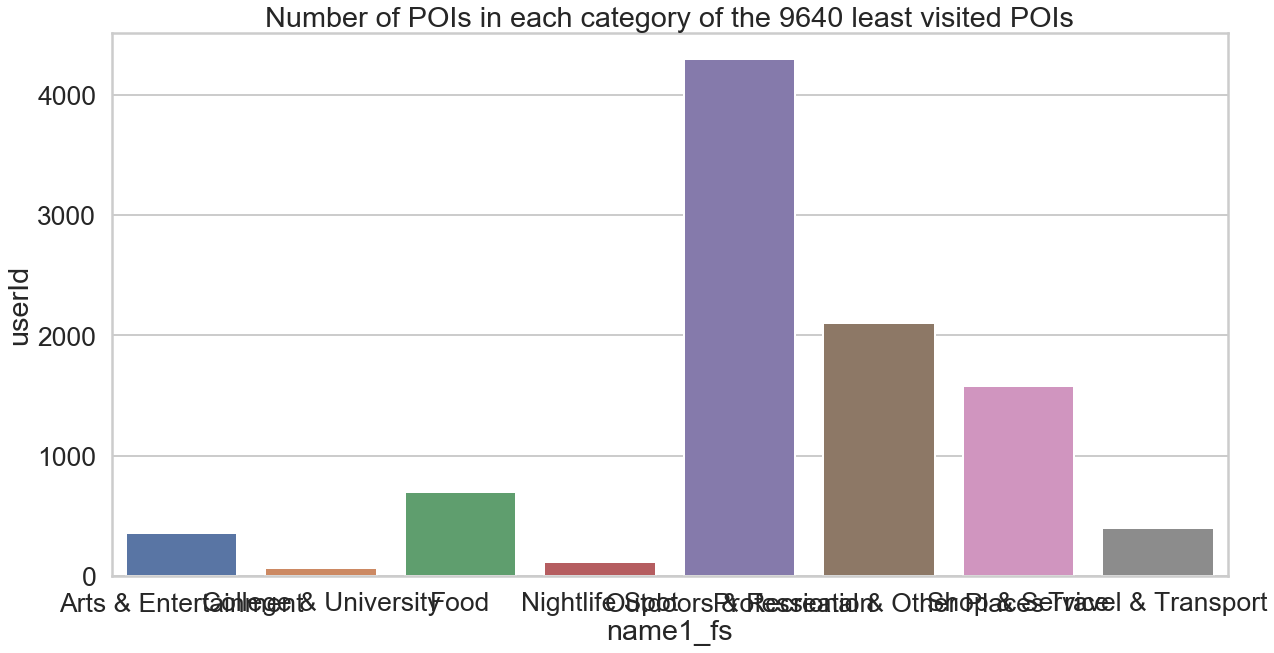

In [55]:
#This plot shows how many POIs that are in each category
sns.barplot(x = 'name1_fs', y = 'userId', data=leastVisitN1).set(title='Number of POIs in each category of the 9640 least visited POIs')

In [56]:
weekVisit = df[df.stop_type == 'poi'].groupby(['weekday', 'name1_fs']).count()['userId'].unstack()
weekVisit

name1_fs,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
weekday,,,,,,,,
1,26901,11142,124108,9166,104900,152133,258698,32534
2,17760,25485,104759,6315,93351,187720,218171,30969
3,19444,27227,105989,6868,91819,209518,205153,32743
4,22368,28418,124489,8280,106224,228553,238299,37977
5,22253,28281,131007,8892,104945,232377,249007,39981
6,30848,22726,169718,12318,119688,234625,294081,45916
7,44529,16806,189128,15679,135357,187422,356561,47396


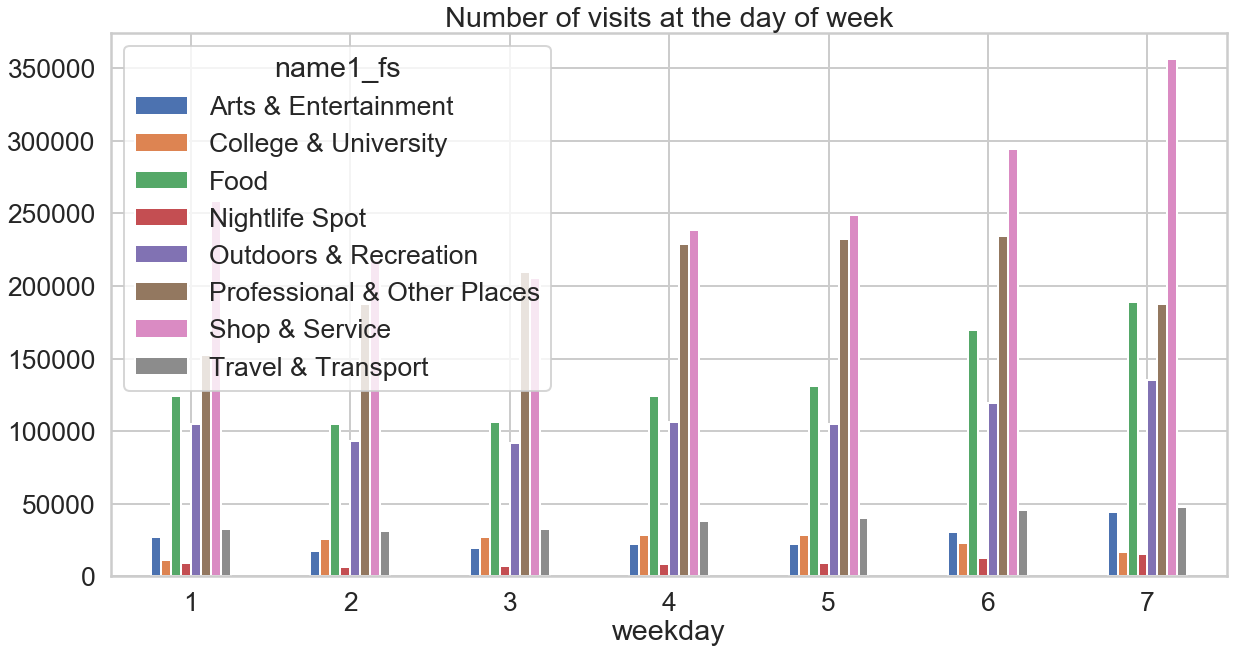

In [57]:
weekVisit.plot.bar()
plt.title('Number of visits at the day of week')
plt.xticks(rotation = 0)
plt.show()

In [58]:
hourVisit = df[df.stop_type == 'poi'].groupby(['hour', 'name1_fs']).count()['userId'].unstack()

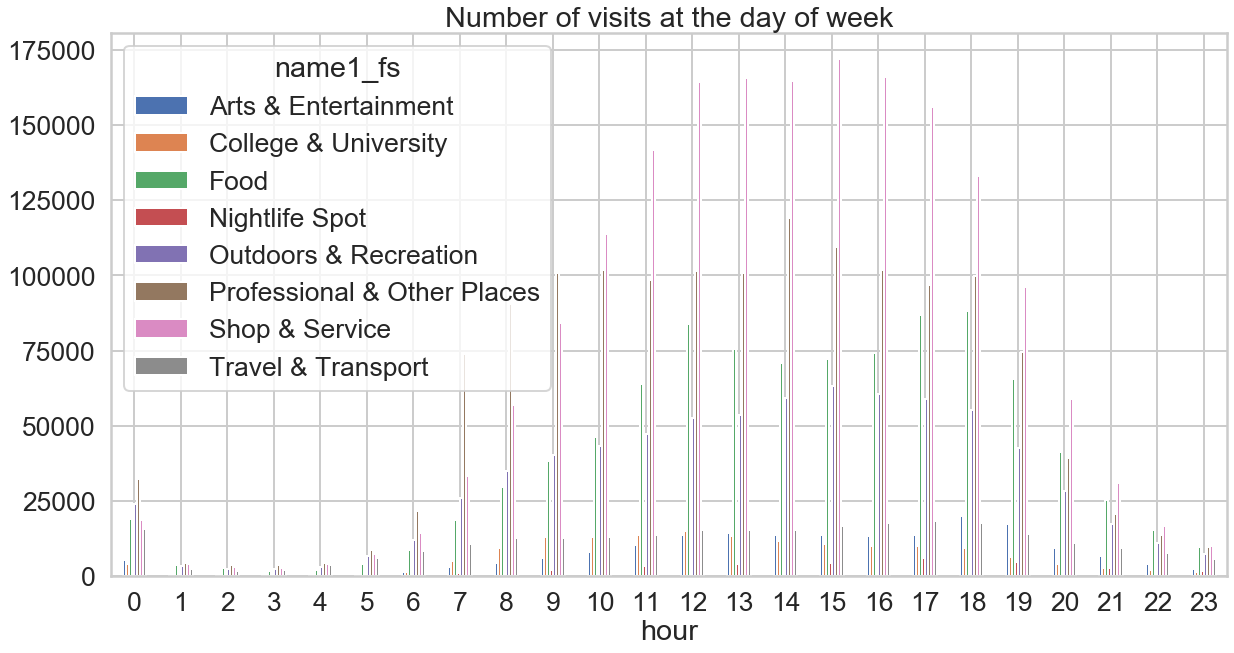

In [59]:
hourVisit.plot.bar()
plt.title('Number of visits at the day of week')
plt.xticks(rotation = 0)
plt.show()

In [60]:
#daily stop
dayCount = df.groupby('weekday').count().reset_index()
dayCount

,weekday,userId,incrementalId,POIId,hour,stop_type,name1_fs,name2_fs
0,1,2820841,2820841,719582,2820841,2820841,719582,719582
1,2,3338634,3338634,684530,3338634,3338634,684530,684530
2,3,3470821,3470821,698761,3470821,3470821,698761,698761
3,4,3824703,3824703,794608,3824703,3824703,794608,794608
4,5,3915974,3915974,816743,3915974,3915974,816743,816743
5,6,4104609,4104609,929920,4104609,4104609,929920,929920
6,7,3570317,3570317,992878,3570317,3570317,992878,992878


In [61]:
sns.set_palette("hls", 8)

[Text(0.5, 1.0, 'Number of stops each day')]

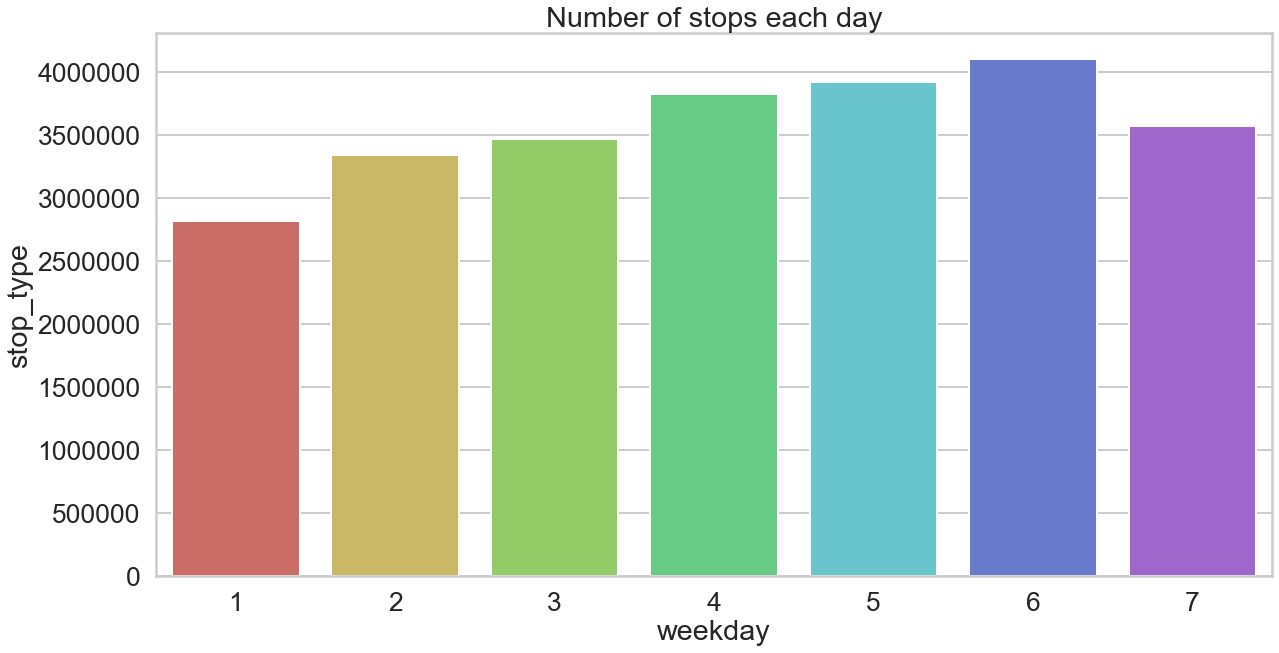

In [62]:
sns.barplot(x = 'weekday', y = 'stop_type', data= dayCount).set(title='Number of stops each day')

In [63]:
#daily stop
hourCount = df.groupby('hour').count().reset_index()
hourCount

,hour,userId,incrementalId,POIId,weekday,stop_type,name1_fs,name2_fs
0,0,4957364,4957364,124585,4957364,4957364,124585,124585
1,1,132877,132877,20390,132877,132877,20390,20390
2,2,94584,94584,15070,94584,94584,15070,15070
3,3,80806,80806,13819,80806,80806,13819,13819
4,4,91253,91253,18180,91253,91253,18180,18180
5,5,157885,157885,34695,157885,157885,34695,34695
6,6,359630,359630,68379,359630,359630,68379,68379
7,7,1044874,1044874,171743,1044874,1044874,171743,171743
8,8,1131222,1131222,240522,1131222,1131222,240522,240522
9,9,1038217,1038217,297952,1038217,1038217,297952,297952


In [64]:
#fraction of all stops made at 0. 
4957364/(hourCount.sum()['userId'])

0.19793116629592733

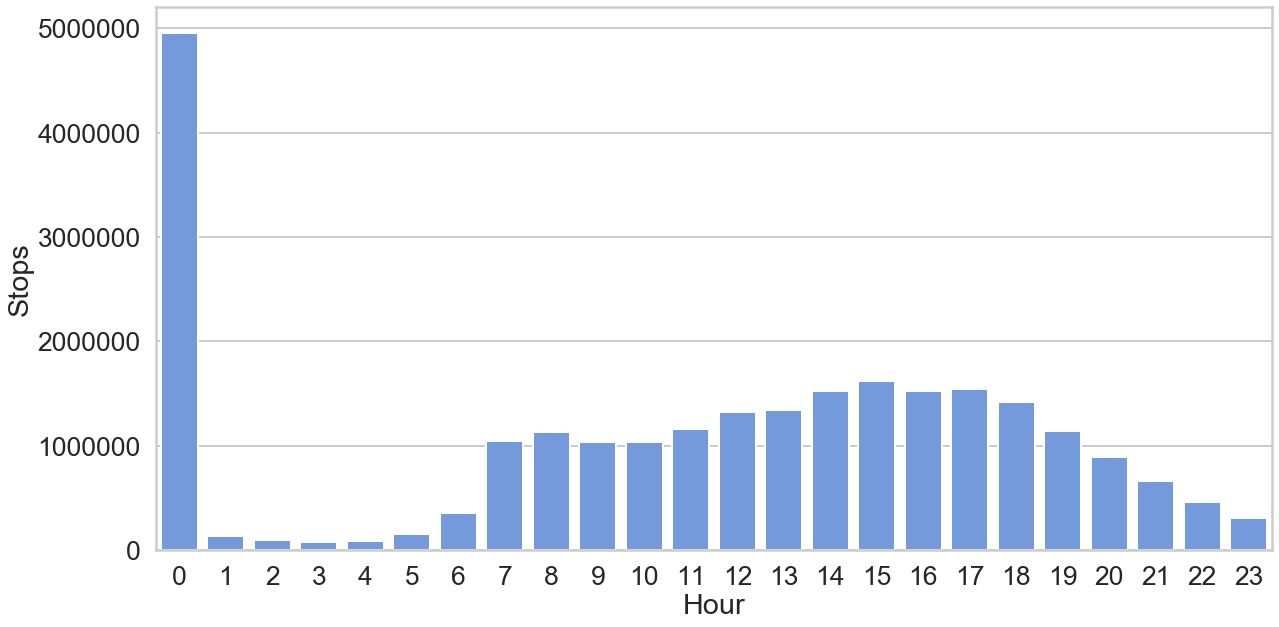

In [65]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

sns.barplot(x = 'hour', y = 'stop_type', data=hourCount, color = 'cornflowerblue')
plt.xlabel('Hour')
plt.ylabel('Stops')
plt.savefig('hourStopPrevious.png', bbox_inches='tight') #Save plot
plt.show()

In [66]:
#Check stop at hour 0
midnightdf = df[df.hour == 0]
midnightUsers = midnightdf['userId'].unique()
midnightTest = midnightdf[midnightdf['userId'].isin(random.sample(list(midnightUsers),10))]

In [67]:
midnightTest

,userId,incrementalId,POIId,weekday,hour,stop_type,name1_fs,name2_fs
2767975,10939,6,NaN,6,0,home,NaN,NaN
2767978,10939,9,NaN,7,0,home,NaN,NaN
2767984,10939,15,NaN,1,0,home,NaN,NaN
2767986,10939,17,NaN,2,0,other,NaN,NaN
2767987,10939,18,NaN,2,0,home,NaN,NaN
...,...,...,...,...,...,...,...,...
18021857,34359751643,444,NaN,3,0,home,NaN,NaN
18021865,34359751643,452,NaN,4,0,home,NaN,NaN
18021873,34359751643,460,NaN,5,0,home,NaN,NaN
18021882,34359751643,469,NaN,6,0,home,NaN,NaN


In [68]:
#Save current stop and previous stop and appends to list
midnightStop = []
for i in range(midnightTest.shape[0]):
    if midnightTest.iloc[i][1] > 1: #if it is not the first stop
        curStop = midnightTest.iloc[i][5] #stopType
        prevStop = df.loc[(df['userId'] == midnightTest.iloc[i][0]) & (df['incrementalId'] == midnightTest.iloc[i][1]-1)].iloc[0][5] #stopType of the previous stop
        midnightStop.append(prevStop + " " + curStop)

In [69]:
midnightStopCount = Counter(midnightStop)

midnightCount = dict(sorted(midnightStopCount.items(),
                           key=lambda item: item[1],
                           reverse=True))

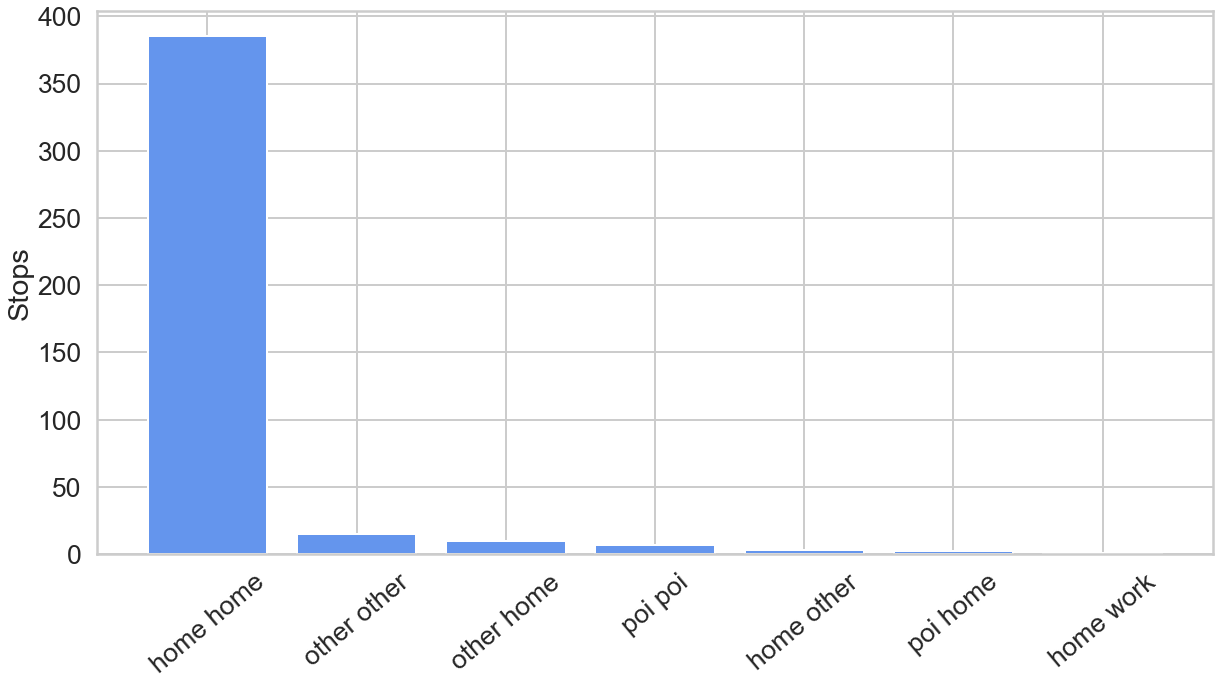

In [70]:
plt.bar(list(midnightCount), midnightCount.values(), color='cornflowerblue')
plt.xticks(rotation=40)
plt.ylabel('Stops')
plt.savefig('midnightStops.png', bbox_inches='tight') #Save plot
plt.show()

In [71]:
df = df.copy()

In [72]:
df['TimeOfWeek'] = (df['weekday']-1) * 24  + df['hour']
df

,userId,incrementalId,POIId,weekday,hour,stop_type,name1_fs,name2_fs,TimeOfWeek
0,0,1,NaN,4,0,home,NaN,NaN,72
1,0,2,NaN,4,11,other,NaN,NaN,83
2,0,3,NaN,4,12,home,NaN,NaN,84
3,0,4,NaN,5,0,home,NaN,NaN,96
4,0,5,1.357210e+12,5,10,poi,Professional & Other Places,Medical Center,106
...,...,...,...,...,...,...,...,...,...
25114422,51539619951,355,NaN,6,13,home,NaN,NaN,133
25114423,51539619951,356,NaN,6,18,other,NaN,NaN,138
25114424,51539619951,357,NaN,6,22,home,NaN,NaN,142
25114425,51539619951,358,NaN,7,0,home,NaN,NaN,144


In [73]:
#stop at hour of week
WeekTimeCount = df.groupby('TimeOfWeek').count().reset_index()
WeekTimeCount

,TimeOfWeek,userId,incrementalId,POIId,weekday,hour,stop_type,name1_fs,name2_fs
0,0,662147,662147,29933,662147,662147,662147,29933,29933
1,1,27820,27820,4603,27820,27820,27820,4603,4603
2,2,18704,18704,3134,18704,18704,18704,3134,3134
3,3,14096,14096,2377,14096,14096,14096,2377,2377
4,4,12006,12006,2212,12006,12006,12006,2212,2212
...,...,...,...,...,...,...,...,...,...
163,163,167331,167331,56626,167331,167331,167331,56626,56626
164,164,137202,137202,38811,137202,137202,137202,38811,38811
165,165,115556,115556,26829,115556,115556,115556,26829,26829
166,166,95972,95972,18306,95972,95972,95972,18306,18306


[Text(0.5, 1.0, 'Number of stops each hour of the week')]

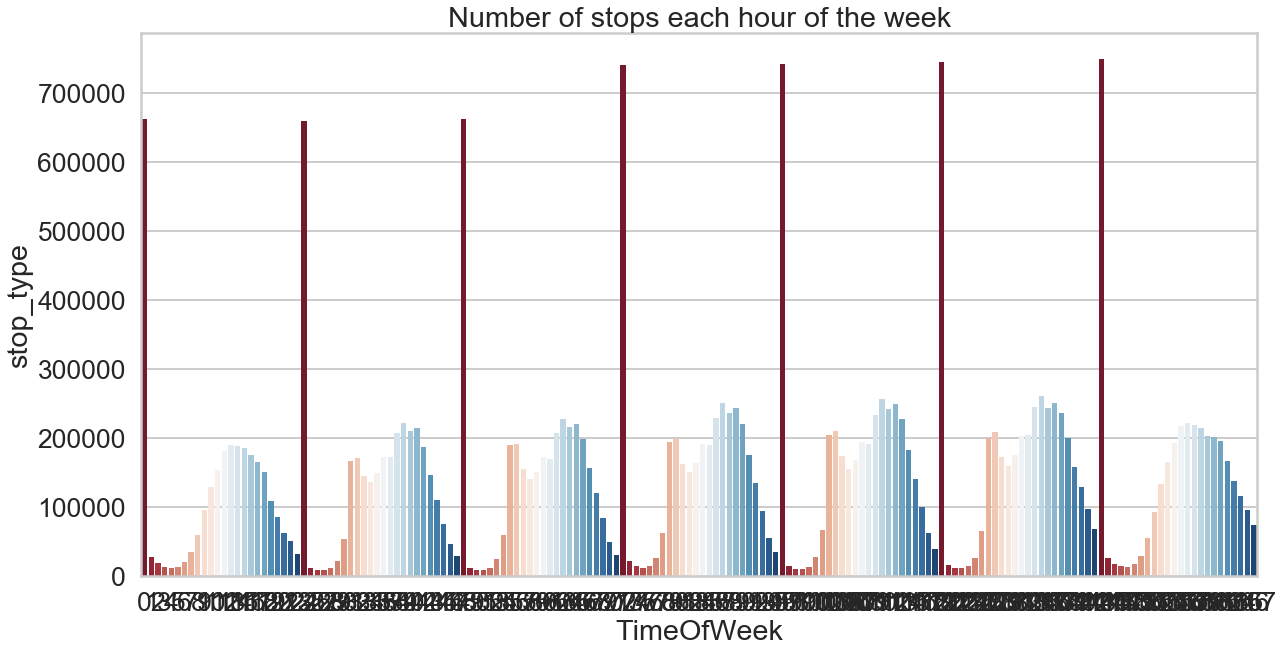

In [74]:
sns.barplot(x = 'TimeOfWeek', y = 'stop_type', data=WeekTimeCount, palette = sns.color_palette("RdBu", n_colors = 24), lw=0.).set(title='Number of stops each hour of the week')

In [75]:
day1 = df[df['weekday'] ==1].groupby('TimeOfWeek').count().reset_index()
day2 = df[df['weekday'] ==2].groupby('TimeOfWeek').count().reset_index()
day3 = df[df['weekday'] ==3].groupby('TimeOfWeek').count().reset_index()
day4 = df[df['weekday'] ==4].groupby('TimeOfWeek').count().reset_index()
day5 = df[df['weekday'] ==5].groupby('TimeOfWeek').count().reset_index()
day6 = df[df['weekday'] ==6].groupby('TimeOfWeek').count().reset_index()
day7 = df[df['weekday'] ==7].groupby('TimeOfWeek').count().reset_index()

In [76]:
days = pd.DataFrame({"Day 1": day1['stop_type'],
                    "Day 2" : day2['stop_type'],
                  "Day 3" : day3['stop_type'],
                  "Day 4" : day4['stop_type'],
                  "Day 5" : day5['stop_type'],
                  "Day 6" : day6['stop_type'],
                  "Day 7" : day7['stop_type'],
                    "Hour": [0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]})

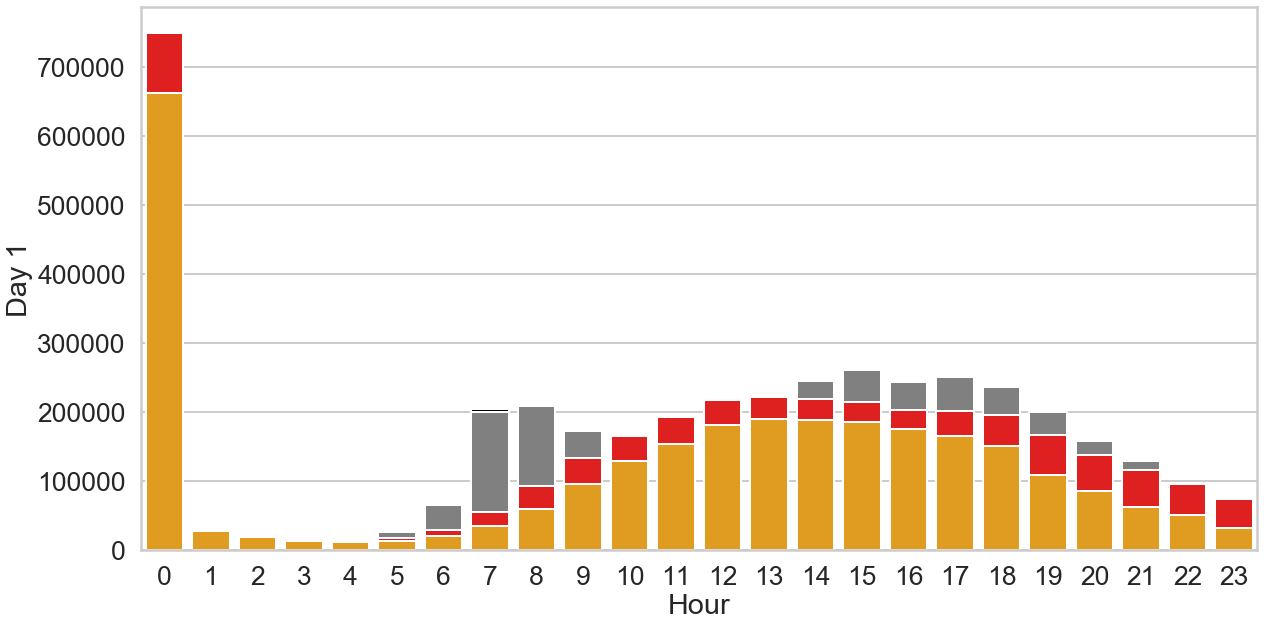

In [77]:
s2 = sns.barplot(x = 'Hour', y = 'Day 2', data = days, color = 'blue')
s3 = sns.barplot(x = 'Hour', y = 'Day 3', data = days, color = 'green')
s4 = sns.barplot(x = 'Hour', y = 'Day 4', data = days, color = 'pink')
s5 = sns.barplot(x = 'Hour', y = 'Day 5', data = days, color = 'black')
s6 = sns.barplot(x = 'Hour', y = 'Day 6', data = days, color = 'grey')
s7 = sns.barplot(x = 'Hour', y = 'Day 7', data = days, color = 'red')
s1 = sns.barplot(x = 'Hour', y = 'Day 1', data = days, color = 'orange')

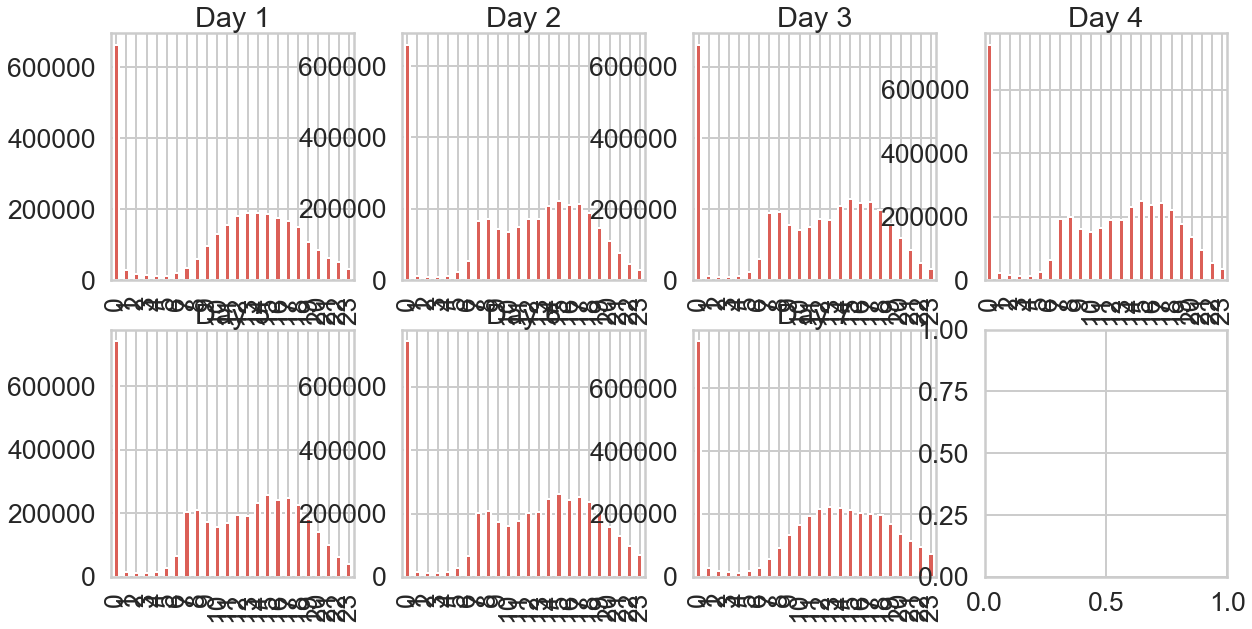

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=4)

day1['stop_type'].plot.bar(ax=axes[0,0], title = 'Day 1')
day2['stop_type'].plot.bar(ax=axes[0,1], title = 'Day 2')
day3['stop_type'].plot.bar(ax=axes[0,2], title = 'Day 3')
day4['stop_type'].plot.bar(ax=axes[0,3], title = 'Day 4')
day5['stop_type'].plot.bar(ax=axes[1,0], title = 'Day 5')
day6['stop_type'].plot.bar(ax=axes[1,1], title = 'Day 6')
day7['stop_type'].plot.bar(ax=axes[1,2], title = 'Day 7')
plt.show()